#            BOOK RECOMMENDATION SYSTEM

## EDA(EXPLORATORY DATA ANALYSIS)

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity 
from scipy.sparse import csr_matrix 
import random
import re
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the user data into df
users=pd.read_csv("Users.csv")
# loading ratigs data into df
ratings=pd.read_csv("ratings.csv")
# loading books data into df
books=pd.read_excel("Books.xlsx")

In [3]:
user_df=users
ratings_df=ratings
books_df=books

In [4]:
# ADD THIS RIGHT AFTER LOADING RATINGS:
user_counts = ratings_df.groupby('User-ID').size()
book_counts = ratings_df.groupby('ISBN').size()

users_keep = user_counts[user_counts >= 5].index
books_keep = book_counts[book_counts >= 5].index

ratings_df = ratings_df[(ratings_df['User-ID'].isin(users_keep)) & 
                        (ratings_df['ISBN'].isin(books_keep))]

# USERS

In [5]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [7]:
user_df.shape

(278858, 3)

In [8]:
user_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [9]:
user_df.duplicated().sum()

np.int64(0)

In [10]:
user_df.duplicated(subset=['User-ID']).sum()

np.int64(0)

In [11]:
user_df['User-ID']

0              1
1              2
2              3
3              4
4              5
           ...  
278853    278854
278854    278855
278855    278856
278856    278857
278857    278858
Name: User-ID, Length: 278858, dtype: int64

In [12]:
user_df['User-ID'].nunique()

278858

In [13]:
user_df['Location']

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, Length: 278858, dtype: object

In [14]:
user_df['Location'].dtype

dtype('O')

In [15]:
user_df['Location'].describe()

count                              278858
unique                              57339
top       london, england, united kingdom
freq                                 2506
Name: Location, dtype: object

In [16]:
user_df['Age']

0          NaN
1         18.0
2          NaN
3         17.0
4          NaN
          ... 
278853     NaN
278854    50.0
278855     NaN
278856     NaN
278857     NaN
Name: Age, Length: 278858, dtype: float64

In [17]:
user_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [18]:
user_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

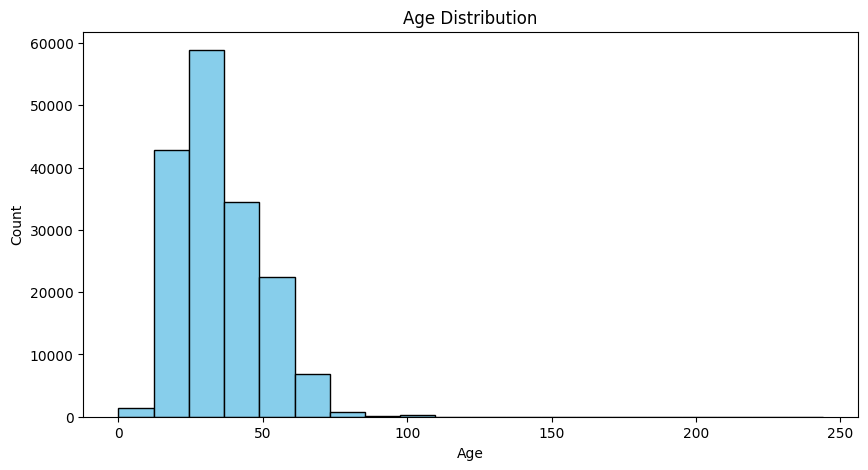

In [19]:
# Histogram
plt.figure(figsize=(10,5))
plt.hist(user_df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

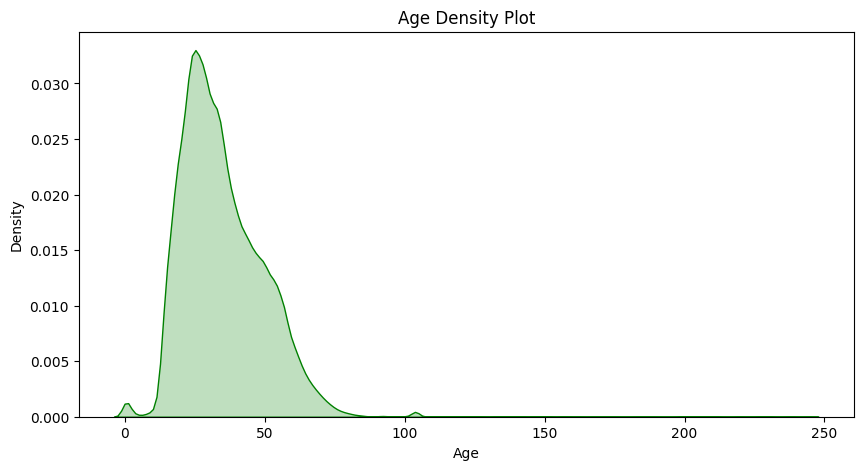

In [20]:
# KDE (Density Plot)
plt.figure(figsize=(10,5))
sns.kdeplot(user_df['Age'].dropna(), shade=True, color='green')
plt.title('Age Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

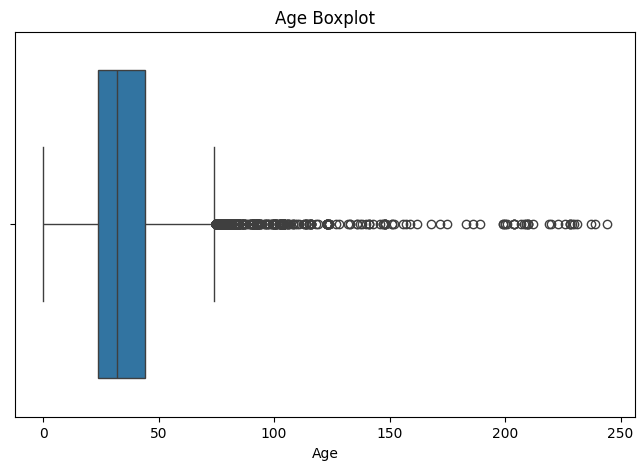

In [21]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=user_df['Age'])
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()

From these plots there are more outliers in the age column as per the real world the age must be >0 and <120 to 130 years

In [22]:
Q1=user_df['Age'].quantile(0.25)
Q3=user_df['Age'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-IQR
upper_bound=Q3+IQR

In [23]:
lower_bound,upper_bound

(np.float64(4.0), np.float64(64.0))

Here upper bound is 64 and treating >64 as outliers is invalid .so, according to domain knkowledge we take upper bound as 120

In [24]:
min_age=0
max_age=120

In [25]:
outliers = user_df['Age'][(user_df['Age'] < min_age) | (user_df['Age'] > max_age)]

In [26]:
outliers

1578      231.0
8457      230.0
8781      239.0
11325     148.0
12691     151.0
          ...  
257429    200.0
261553    143.0
264933    140.0
275582    189.0
276047    127.0
Name: Age, Length: 78, dtype: float64

In [27]:
user_df['Age'].isna().sum()

np.int64(110762)

In [28]:
user_df['Age'] = user_df['Age'].fillna(-1)

In [29]:
user_df['Age'] = user_df['Age'].apply(lambda x: -1 if (x < min_age or x > max_age) else x)

In [30]:
user_df['Age'].describe()

count    278858.000000
mean         20.502958
std          20.613228
min          -1.000000
25%          -1.000000
50%          22.000000
75%          35.000000
max         119.000000
Name: Age, dtype: float64

In [31]:
len(user_df['Age'][user_df['Age']==-1])

110840

**we have 110840 values are -1 in the age** 

In [32]:
# Better age handling
user_df['Age'] = user_df['Age'].replace(-1, user_df[user_df['Age'] > 0]['Age'].median())

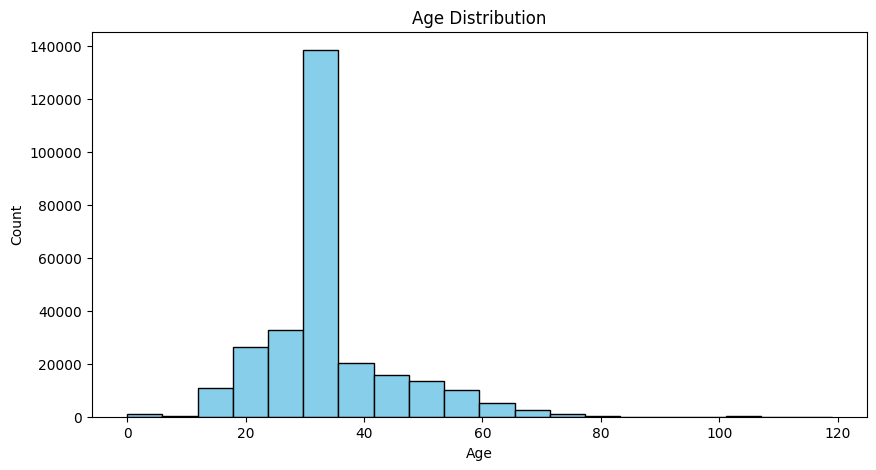

In [33]:
# Histogram
plt.figure(figsize=(10,5))
plt.hist(user_df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [34]:
user_df.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",32.0
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",32.0
278856,278857,"knoxville, tennessee, usa",32.0
278857,278858,"dublin, n/a, ireland",32.0


## Ratings

In [35]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
10,276746,0425115801,0
11,276746,0449006522,0
12,276746,0553561618,0
13,276746,055356451X,0
14,276746,0786013990,0


In [36]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623405 entries, 10 to 1149772
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      623405 non-null  int64 
 1   ISBN         623405 non-null  object
 2   Book-Rating  623405 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 19.0+ MB


In [37]:
ratings_df.shape

(623405, 3)

In [38]:
ratings_df.describe()

,User-ID,Book-Rating
count,623405.000000,623405.000000
mean,140087.512534,2.678585
std,80509.990928,3.817335
min,8.000000,0.000000
25%,69971.000000,0.000000
50%,140000.000000,0.000000
75%,211117.000000,7.000000
max,278854.000000,10.000000


In [39]:
ratings_df.duplicated().sum()

np.int64(0)

In [40]:
ratings_df.duplicated(subset=['User-ID','ISBN']).sum()

np.int64(0)

In [41]:
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [42]:
ratings_df.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [43]:
ratings_df.reset_index(drop=True,inplace=True)

In [44]:
ratings_df['User-ID'].head()

0    276746
1    276746
2    276746
3    276746
4    276746
Name: User-ID, dtype: int64

In [45]:
ratings_df['User-ID'].nunique()

22072

There are 22072 unique users wo have given ratings on different books 

In [46]:
user_counts=ratings_df['User-ID'].value_counts()
user_counts

User-ID
11676     7941
35859     3529
153662    3243
198711    2568
76352     2486
          ... 
264091       1
264106       1
264184       1
33834        1
276813       1
Name: count, Length: 22072, dtype: int64

In [47]:
top_users=user_counts.head(20)
top_users

User-ID
11676     7941
35859     3529
153662    3243
198711    2568
76352     2486
98391     2189
16795     1904
204864    1798
212898    1782
227447    1677
230522    1612
55492     1595
102967    1583
234623    1561
278418    1531
78783     1528
60244     1521
235105    1521
190925    1515
129358    1507
Name: count, dtype: int64

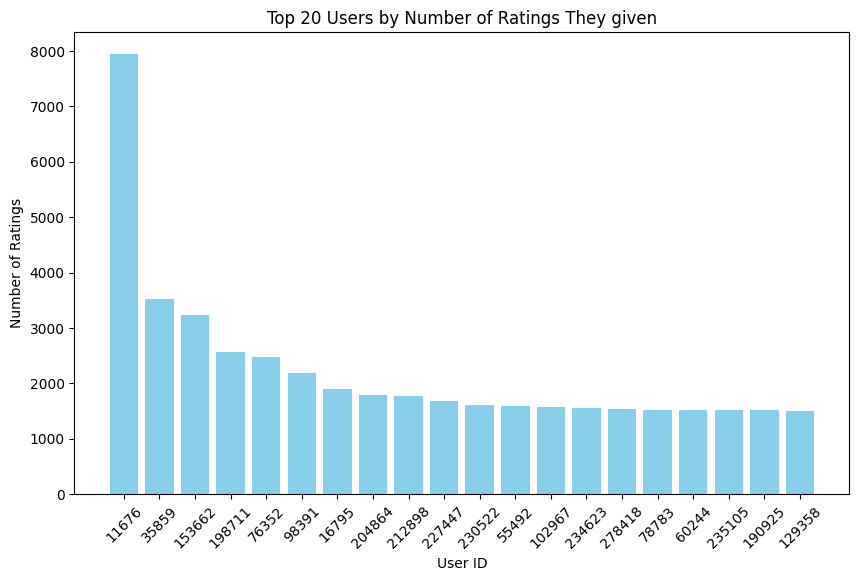

In [48]:
# Plot
plt.figure(figsize=(10,6))
plt.bar(top_users.index.astype(str), top_users.values, color='skyblue')
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.title("Top 20 Users by Number of Ratings They given")
plt.xticks(rotation=45)
plt.show()

In [49]:
bottom_users=user_counts.tail(20)
bottom_users

User-ID
231529    1
231742    1
128611    1
131866    1
34727     1
264005    1
35254     1
264554    1
32781     1
184672    1
184860    1
264193    1
264338    1
33995     1
34018     1
264091    1
264106    1
264184    1
33834     1
276813    1
Name: count, dtype: int64

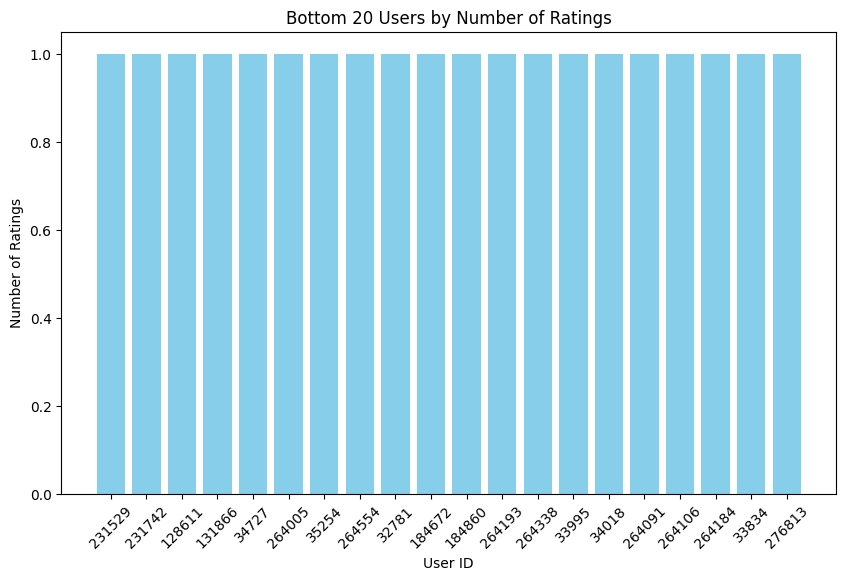

In [50]:
# Plot
plt.figure(figsize=(10,6))
plt.bar(bottom_users.index.astype(str), bottom_users.values, color='skyblue')
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.title("Bottom 20 Users by Number of Ratings")
plt.xticks(rotation=45)
plt.show()

In [51]:
ratings_df['ISBN']

0         0425115801
1         0449006522
2         0553561618
3         055356451X
4         0786013990
             ...    
623400    0441007813
623401    0446353957
623402    0446605409
623403    0743211383
623404    080410526X
Name: ISBN, Length: 623405, dtype: object

In [52]:
ratings_df['ISBN'].nunique()

43748

There are 43748 differnent books have been rated by the 105283 users

A Valid ISBN's

Type&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;	|Length	&nbsp;&nbsp;|Characters&nbsp;Allowed

ISBN-10	|&nbsp;&nbsp;10	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|0–9, last char may be X

ISBN-13	|&nbsp;&nbsp;13	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|0–9 only

In [53]:
def pad_isbn(isbn):
    isbn = str(isbn).strip()
    isbn = isbn.replace("-", "").replace(" ", "")
    if len(isbn) < 10:
        isbn = isbn.zfill(10)
    return isbn
def is_valid_isbn(isbn):
    isbn = str(isbn).strip().replace("-", "").replace(" ", "")
    
    # Handle lowercase 'x' in ISBN-10
    if len(isbn) == 10:
        if isbn[-1].lower() == 'x':
            isbn = isbn[:-1] + 'X'
        if not (isbn[:9].isdigit() and (isbn[9].isdigit() or isbn[9] == 'X')):
            return False
        total = sum(int(isbn[i]) * (10 - i) for i in range(9))
        last = 10 if isbn[9] == 'X' else int(isbn[9])
        total += last
        return total % 11 == 0
    
    # ISBN-13
    if len(isbn) == 13 and isbn.isdigit():
        total = 0
        for i in range(12):
            total += int(isbn[i]) * (1 if i % 2 == 0 else 3)
        check_digit = (10 - (total % 10)) % 10
        return check_digit == int(isbn[12])
    
    return False

In [54]:
ratings_df['ISBN'] = ratings_df['ISBN'].apply(pad_isbn)

In [55]:
ratings_df['is_valid']=ratings_df['ISBN'].apply(is_valid_isbn)

In [56]:
ratings_df['is_valid'].value_counts()

is_valid
True     622793
False       612
Name: count, dtype: int64

In [57]:
13347/1136433 # It give 1 % of data so we can drop these invalid roes

0.01174464310698475

In [58]:
# Dropping the invalid ISBN values
ratings_df = ratings_df[ratings_df['is_valid'] == True]

In [59]:
ratings_df.shape

(622793, 4)

In [60]:
ratings_df.drop(columns=['is_valid'], inplace=True)

In [61]:
books_count=ratings_df['ISBN'].value_counts()
books_count

ISBN
0971880107    1686
0316666343     981
0385504209     722
0060928336     600
0312195516     554
              ... 
1863252851       1
8879839993       1
0967375207       1
8826703132       1
3442720001       1
Name: count, Length: 43650, dtype: int64

In [62]:
most_read_books=books_count.head(20)
most_read_books

ISBN
0971880107    1686
0316666343     981
0385504209     722
0060928336     600
0312195516     554
0142001740     511
0679781587     501
067976402X     497
0671027360     496
044023722X     494
0446672211     485
059035342X     484
0440214041     470
044021145X     466
0440211727     464
0345337662     463
0804106304     452
0316601950     446
0375727345     421
0345370775     419
Name: count, dtype: int64

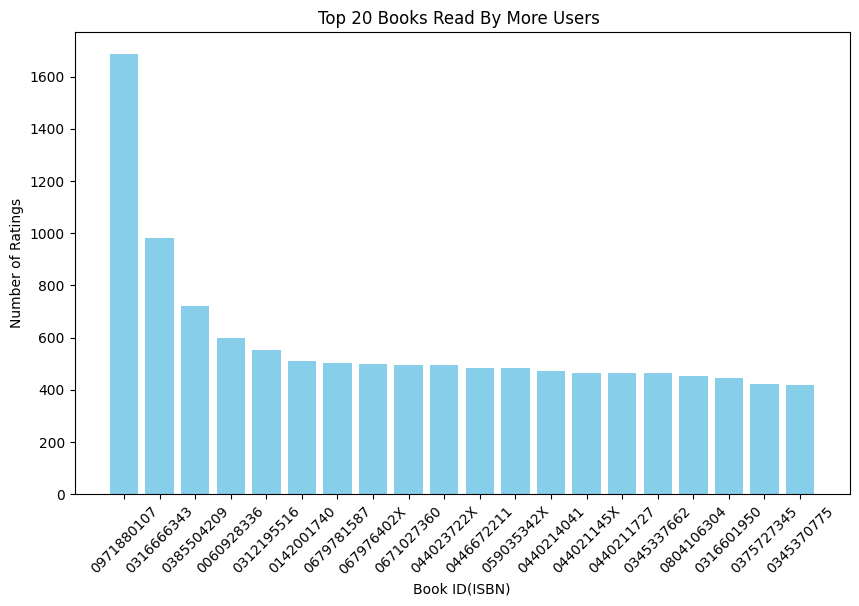

In [63]:
# Plot
plt.figure(figsize=(10,6))
plt.bar(most_read_books.index.astype(str), most_read_books.values, color='skyblue')
plt.xlabel("Book ID(ISBN)")
plt.ylabel("Number of Ratings")
plt.title("Top 20 Books Read By More Users ")
plt.xticks(rotation=45)
plt.show()

In [64]:
least_read_books=books_count.tail(20)
least_read_books

ISBN
3548208975    1
8886350805    1
0595204589    1
0771099509    1
8807815761    1
9728436440    1
8871781600    1
9728436432    1
1569753210    1
0590026119    1
0060196254    1
0738204005    1
0819310441    1
0771041845    1
1860497497    1
1863252851    1
8879839993    1
0967375207    1
8826703132    1
3442720001    1
Name: count, dtype: int64

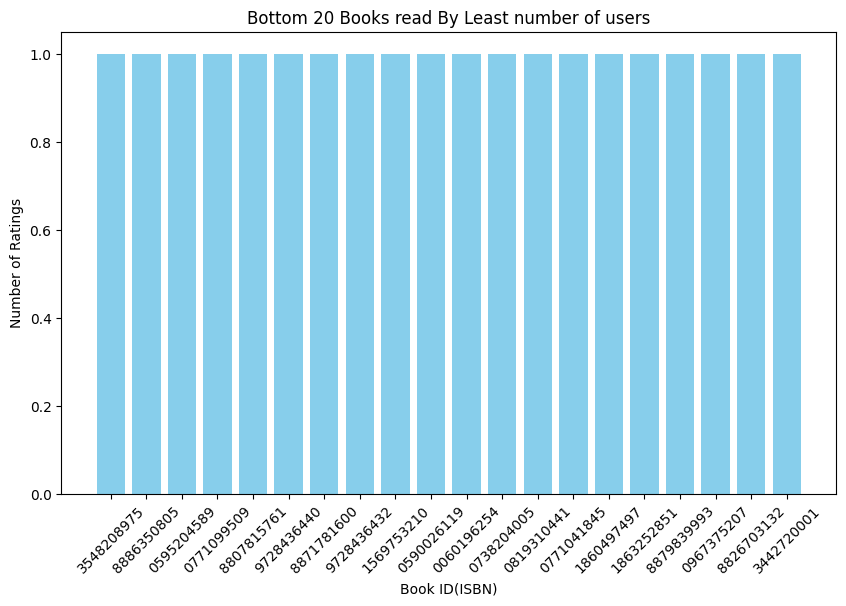

In [65]:
# Plot
plt.figure(figsize=(10,6))
plt.bar(least_read_books.index.astype(str), least_read_books.values, color='skyblue')
plt.xlabel("Book ID(ISBN)")
plt.ylabel("Number of Ratings")
plt.title("Bottom 20 Books read By Least number of users")
plt.xticks(rotation=45)
plt.show()

In [66]:
ratings_df['Book-Rating']

0         0
1         0
2         0
3         0
4         0
         ..
623400    0
623401    0
623402    0
623403    7
623404    0
Name: Book-Rating, Length: 622793, dtype: int64

In [67]:
ratings_df['Book-Rating'].dtype

dtype('int64')

In [68]:
ratings_df['Book-Rating'].describe()

count    622793.000000
mean          2.678505
std           3.817315
min           0.000000
25%           0.000000
50%           0.000000
75%           7.000000
max          10.000000
Name: Book-Rating, dtype: float64

The highest rating is 10 and the least rating is 0

In [69]:
ratings_df['Book-Rating'].value_counts()

Book-Rating
0     406030
8      53126
10     40380
7      37425
9      36743
5      22782
6      17511
4       4074
3       2712
2       1266
1        744
Name: count, dtype: int64

Most of the user had given 0 ratings and rating 1 is given by less users.

Text(0, 0.5, 'Count')

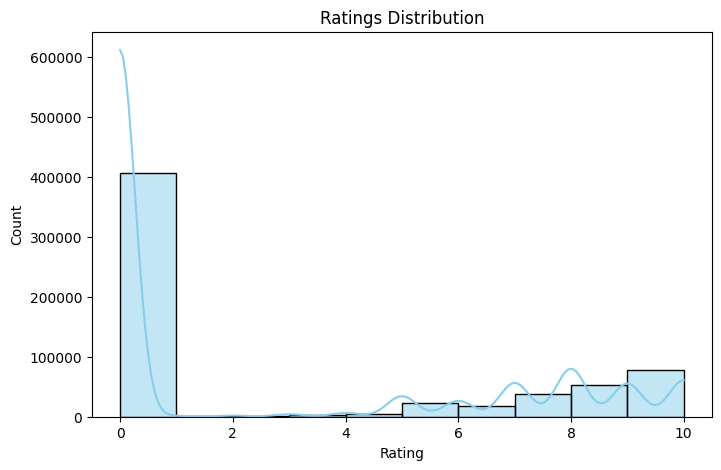

In [70]:
plt.figure(figsize=(8,5))
# Histogram
sns.histplot(ratings_df['Book-Rating'], bins=10, kde=True, color='skyblue')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")

Text(0.5, 1.0, 'Book Ratings Boxplot')

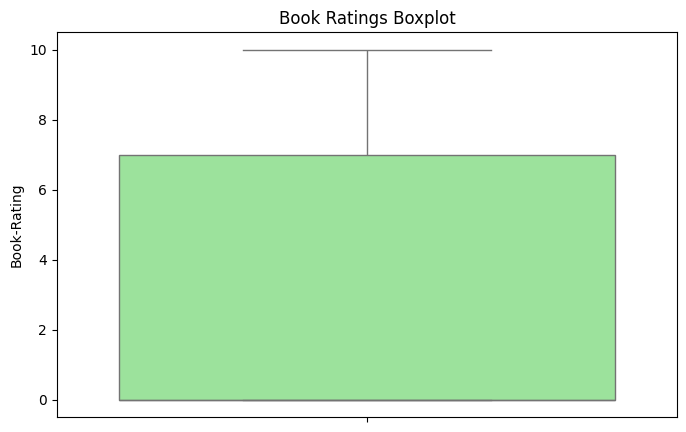

In [71]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(y=ratings_df['Book-Rating'], color='lightgreen')
plt.title("Book Ratings Boxplot")

In [72]:
Top_Rated_books=ratings_df['ISBN'][ratings_df['Book-Rating']>=9]

In [73]:
Top_Rated_books.unique()

array(['0060517794', '0671537458', '3499230933', ..., '0449911217',
       '0345377818', '0553074946'], shape=(25418,), dtype=object)

In [74]:
len(Top_Rated_books.unique())

25418

There are 76905 high rated books as 9 and 10 

In [75]:
ratings_df.tail(10)

,User-ID,ISBN,Book-Rating
623395,276704,0312873115,0
623396,276704,0345386108,6
623397,276704,0395404258,0
623398,276704,0425060772,0
623399,276704,0440206529,0
623400,276704,0441007813,0
623401,276704,0446353957,0
623402,276704,0446605409,0
623403,276704,0743211383,7
623404,276704,080410526X,0


In [76]:
ratings_df.reset_index(drop=True,inplace=True)

In [77]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276746,0425115801,0
1,276746,0449006522,0
2,276746,0553561618,0
3,276746,055356451X,0
4,276746,0786013990,0
...,...,...,...
622788,276704,0441007813,0
622789,276704,0446353957,0
622790,276704,0446605409,0
622791,276704,0743211383,7


# Books

In [78]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [79]:
books_df.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [80]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [81]:
books_df.shape

(271360, 8)

In [82]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271359,242126,102021,118,16807,271044,271044,271041
top,486404242,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...
freq,2,27,632,17627,7535,2,2,2


* From the above descripion there are 271360 different books In them the books are publishing from 118 years.
* most books are published in 2002. and thre are 16807 different publishers.And **Harlequin** published more books
* The most books are published by the author **Agatha Christie** 

In [83]:
books_df.duplicated().sum()

np.int64(1)

In [84]:
books_df.drop_duplicates(inplace=True)

In [85]:
books_df.duplicated(subset='ISBN').sum()

np.int64(0)

In [86]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [87]:
books_df[books_df.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [88]:
books_df.dropna(inplace=True)

In [89]:
books_df.reset_index(drop=True,inplace=True)

In [90]:
books_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [91]:
books_df['ISBN']

0          195153448
1            2005018
2           60973129
3          374157065
4          393045218
             ...    
271347     440400988
271348     525447644
271349    006008667X
271350     192126040
271351     767409752
Name: ISBN, Length: 271352, dtype: object

In [92]:
books_df['ISBN'].dtype

dtype('O')

In [93]:
books_df['ISBN']=books_df['ISBN'].astype(str)

In [94]:
books_df['ISBN'] = books_df['ISBN'].apply(pad_isbn)
books_df['is_valid'] = books_df['ISBN'].apply(is_valid_isbn)

In [95]:
books_df['is_valid'].value_counts()

is_valid
True     271235
False       117
Name: count, dtype: int64

In [96]:
books_df[books_df['is_valid']==False]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,is_valid
6291,B00009ANY9,Cane River,Lalita Tademy,2001,Warner Books,http://images.amazon.com/images/P/B00009ANY9.0...,http://images.amazon.com/images/P/B00009ANY9.0...,http://images.amazon.com/images/P/B00009ANY9.0...,False
10272,B0000A2U93,Carmilla,Joseph Sheridan Le Fanu,0,Soft Editions Ltd,http://images.amazon.com/images/P/B0000A2U93.0...,http://images.amazon.com/images/P/B0000A2U93.0...,http://images.amazon.com/images/P/B0000A2U93.0...,False
11185,B0000633PU,The Story of Aladdin and the Wonderful Lamp,S. Lane Poole,0,Renaissance eBooks,http://images.amazon.com/images/P/B0000633PU.0...,http://images.amazon.com/images/P/B0000633PU.0...,http://images.amazon.com/images/P/B0000633PU.0...,False
13862,B00007FYKO,Bloodcurdling Tales of Horror and the Macabre:...,H. P. Lovecraft,0,Ballantine,http://images.amazon.com/images/P/B00007FYKO.0...,http://images.amazon.com/images/P/B00007FYKO.0...,http://images.amazon.com/images/P/B00007FYKO.0...,False
13865,B00009APKU,Moby Dick,Herman Melville,0,"Outrigger Publishing, LLC",http://images.amazon.com/images/P/B00009APKU.0...,http://images.amazon.com/images/P/B00009APKU.0...,http://images.amazon.com/images/P/B00009APKU.0...,False
...,...,...,...,...,...,...,...,...,...
252060,B00013AX9E,Modern Contemporary: Aspects of Art at MoMA Si...,P Ed Varnedoe/Antonelli Kick,2000,Museum of Modern Arts,http://images.amazon.com/images/P/B00013AX9E.0...,http://images.amazon.com/images/P/B00013AX9E.0...,http://images.amazon.com/images/P/B00013AX9E.0...,False
256436,B00009NDBF,Help Yourself: Celebrating the Rewards of Resi...,David J. Pelzer,1900,E P Dutton,http://images.amazon.com/images/P/B00009NDBF.0...,http://images.amazon.com/images/P/B00009NDBF.0...,http://images.amazon.com/images/P/B00009NDBF.0...,False
262543,B000023VWR,The Postman Always Rings Twice,James Mallahan Cain,1996,Otto Penzler,http://images.amazon.com/images/P/B000023VWR.0...,http://images.amazon.com/images/P/B000023VWR.0...,http://images.amazon.com/images/P/B000023VWR.0...,False
264199,B00007CWGV,Madonna,Andrew Morton,2001,St. Martin's Press,http://images.amazon.com/images/P/B00007CWGV.0...,http://images.amazon.com/images/P/B00007CWGV.0...,http://images.amazon.com/images/P/B00007CWGV.0...,False


In [97]:
books_df=books_df[books_df['is_valid']==True]

In [98]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,is_valid
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,True
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,True
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,True
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,True
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,True
...,...,...,...,...,...,...,...,...,...
271347,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,True
271348,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,True
271349,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,True
271350,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,True


In [99]:
books_df.reset_index(drop=True,inplace=True)

In [100]:
len(books_df['ISBN'].unique())

271235

In [101]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,is_valid
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,True
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,True
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,True
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,True
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,True
...,...,...,...,...,...,...,...,...,...
271230,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,True
271231,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,True
271232,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,True
271233,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,True


In [102]:
books_df['Book-Title']

0                                       Classical Mythology
1                                              Clara Callan
2                                      Decision in Normandy
3         Flu: The Story of the Great Influenza Pandemic...
4                                    The Mummies of Urumchi
                                ...                        
271230                           There's a Bat in Bunk Five
271231                              From One to One Hundred
271232    Lily Dale : The True Story of the Town that Ta...
271233                          Republic (World's Classics)
271234    A Guided Tour of Rene Descartes' Meditations o...
Name: Book-Title, Length: 271235, dtype: object

In [103]:
books_df['Book-Title'].duplicated().sum()

np.int64(29163)

It is ok to have same book-title as it can be different editions,different publishers and formats(audiobook,e-books,large print editions

In [104]:
books_df['Book-Title'].dtype

dtype('O')

In [105]:
len(books_df['Book-Title'].unique())

242072

In [106]:
books_df[books_df['Book-Title'].isna()==True]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,is_valid


In [107]:
books_df['Book-Author']

0           Mark P. O. Morford
1         Richard Bruce Wright
2                 Carlo D'Este
3             Gina Bari Kolata
4              E. J. W. Barber
                  ...         
271230          Paula Danziger
271231              Teri Sloat
271232        Christine Wicker
271233                   Plato
271234     Christopher  Biffle
Name: Book-Author, Length: 271235, dtype: object

In [108]:
unique_authors=books_df['Book-Author'].unique()

In [109]:
books_df[books_df['Book-Author'].str.contains(r'\d',na=False)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,is_valid
14825,0595319033,The Savior of the Woods,ALB3,2004,"iUniverse, Inc.",http://images.amazon.com/images/P/0595319033.0...,http://images.amazon.com/images/P/0595319033.0...,http://images.amazon.com/images/P/0595319033.0...,True
46027,1557236054,Activity Songs,Disney My First Sing Csdisn 60623,1996,DISNEY AUDIO,http://images.amazon.com/images/P/1557236054.0...,http://images.amazon.com/images/P/1557236054.0...,http://images.amazon.com/images/P/1557236054.0...,True
47616,0160359465,On Course to Desert Storm: The United States N...,S/N 008-046-00146-4,1992,Government Printing Office,http://images.amazon.com/images/P/0160359465.0...,http://images.amazon.com/images/P/0160359465.0...,http://images.amazon.com/images/P/0160359465.0...,True
49490,1405020946,A Prison Diary,FF 8282,2004,MacMillan UK,http://images.amazon.com/images/P/1405020946.0...,http://images.amazon.com/images/P/1405020946.0...,http://images.amazon.com/images/P/1405020946.0...,True
52570,0866835407,BCP Parish Ecomony Edition Red,BCP7230,1983,HarperSanFrancisco,http://images.amazon.com/images/P/0866835407.0...,http://images.amazon.com/images/P/0866835407.0...,http://images.amazon.com/images/P/0866835407.0...,True
60181,1591450217,Open the Eyes of My Heart: Daily Devotions (So...,Songs4worship,2002,Integrity Publishers,http://images.amazon.com/images/P/1591450217.0...,http://images.amazon.com/images/P/1591450217.0...,http://images.amazon.com/images/P/1591450217.0...,True
60182,1591450888,Draw Me Close to You (Songs 4 Worship (Hardcov...,Songs4Worship,2003,Integrity House,http://images.amazon.com/images/P/1591450888.0...,http://images.amazon.com/images/P/1591450888.0...,http://images.amazon.com/images/P/1591450888.0...,True
68785,1572971088,Comedy Central: The Essential Guide to Comedy ...,Christopher 1962 Claro,1997,Berkley Publishing Group,http://images.amazon.com/images/P/1572971088.0...,http://images.amazon.com/images/P/1572971088.0...,http://images.amazon.com/images/P/1572971088.0...,True
87968,055301000X,"\A new spirit, a new commitment, a new America...",1977 Inaugural Committee (U.S.),1977,Bantam Books,http://images.amazon.com/images/P/055301000X.0...,http://images.amazon.com/images/P/055301000X.0...,http://images.amazon.com/images/P/055301000X.0...,True
88233,8424128842,Guia Astrologica de Las Carreras Profesionales,Gilles Db4ambras,1991,Everest Pub,http://images.amazon.com/images/P/8424128842.0...,http://images.amazon.com/images/P/8424128842.0...,http://images.amazon.com/images/P/8424128842.0...,True


In [110]:
books_df['Year-Of-Publication']

0         2002
1         2001
2         1991
3         1999
4         1999
          ... 
271230    1988
271231    1991
271232    2004
271233    1996
271234    2000
Name: Year-Of-Publication, Length: 271235, dtype: object

In [111]:
books_df['Year-Of-Publication'].dtype

dtype('O')

In [112]:
books_df[~books_df['Year-Of-Publication'].astype(str).str.isdigit()]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,is_valid


In [113]:
books_df['Year-Of-Publication']=books_df['Year-Of-Publication'].astype(int)

In [114]:
books_df['Year-Of-Publication'].describe()

count    271235.000000
mean       1960.149059
std         256.537710
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

In [115]:
books_df['Year-Of-Publication'].isna().sum()

np.int64(0)

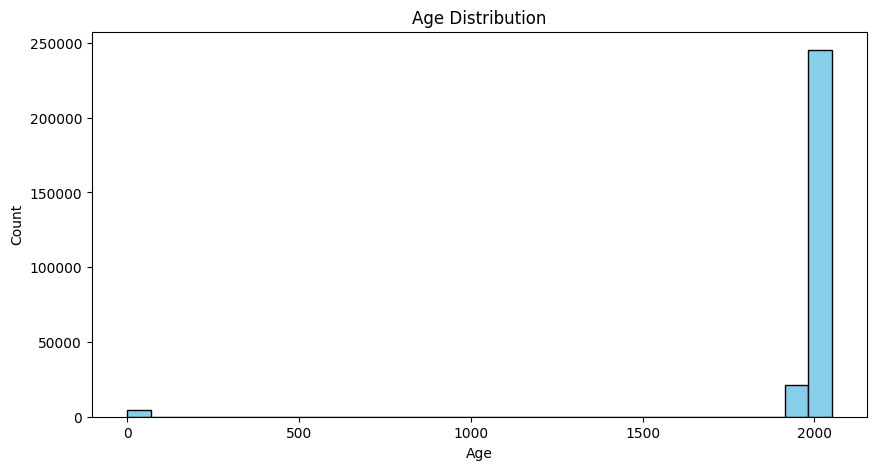

In [116]:
# Histogram
plt.figure(figsize=(10,5))
plt.hist(books_df['Year-Of-Publication'], bins=30, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

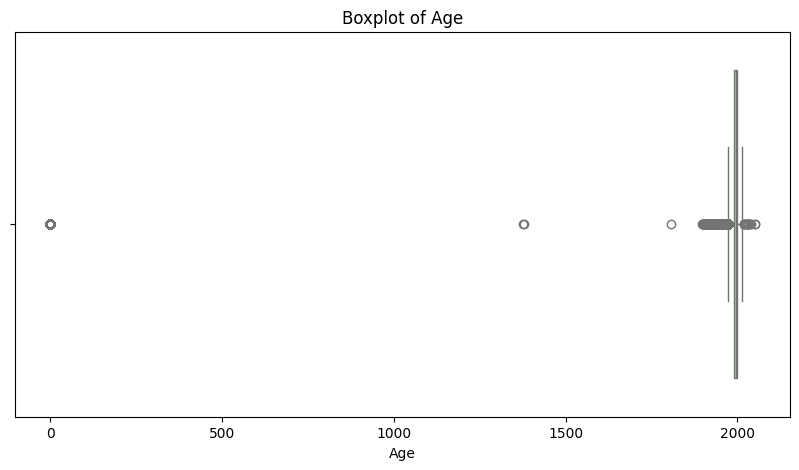

In [117]:

# Boxplot to detect outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=books_df['Year-Of-Publication'], color='lightgreen')
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

Here the year of publication can't be greater than the present year as 2025 and less than 1450 as per domain knowledge the first book was printed in 1450.

In [118]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].apply(
    lambda x: x if 1450 <= x <= 2025 else np.nan
)

In [119]:
books_df['Year-Of-Publication'].isna().sum()

np.int64(4577)

In [120]:
books_df['Year-Of-Publication'].fillna(books_df['Year-Of-Publication'].median(),inplace=True)

In [121]:
books_df['Year-Of-Publication'].describe()

count    271235.000000
mean       1993.730739
std           8.080909
min        1806.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2024.000000
Name: Year-Of-Publication, dtype: float64

In [122]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'is_valid'],
      dtype='object')

In [123]:
books_df['Publisher']

0                                  Oxford University Press
1                                    HarperFlamingo Canada
2                                          HarperPerennial
3                                     Farrar Straus Giroux
4                               W. W. Norton &amp; Company
                                ...                       
271230                     Random House Childrens Pub (Mm)
271231                                        Dutton Books
271232                                  HarperSanFrancisco
271233                             Oxford University Press
271234    McGraw-Hill Humanities/Social Sciences/Languages
Name: Publisher, Length: 271235, dtype: object

In [124]:
books_df['Publisher'].dtype

dtype('O')

In [125]:
books_df['Publisher'].unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      shape=(16782,), dtype=object)

In [126]:
top_publishers=books_df['Publisher'].value_counts().head(20)

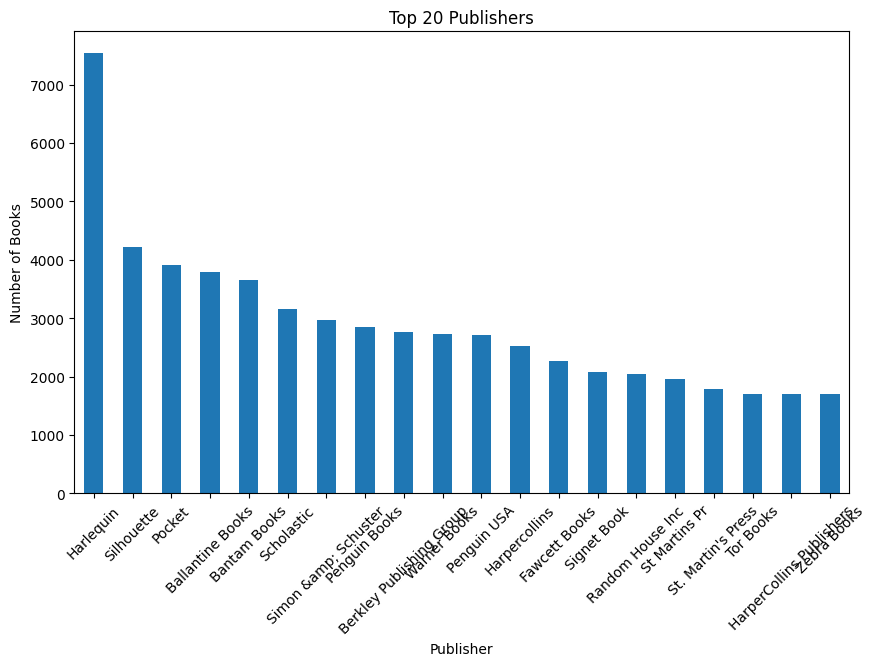

In [127]:
plt.figure(figsize=(10,6))
top_publishers.plot(kind='bar')
plt.title("Top 20 Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.show()

In [128]:
bottom_publishers=books_df['Publisher'].value_counts().tail(20)

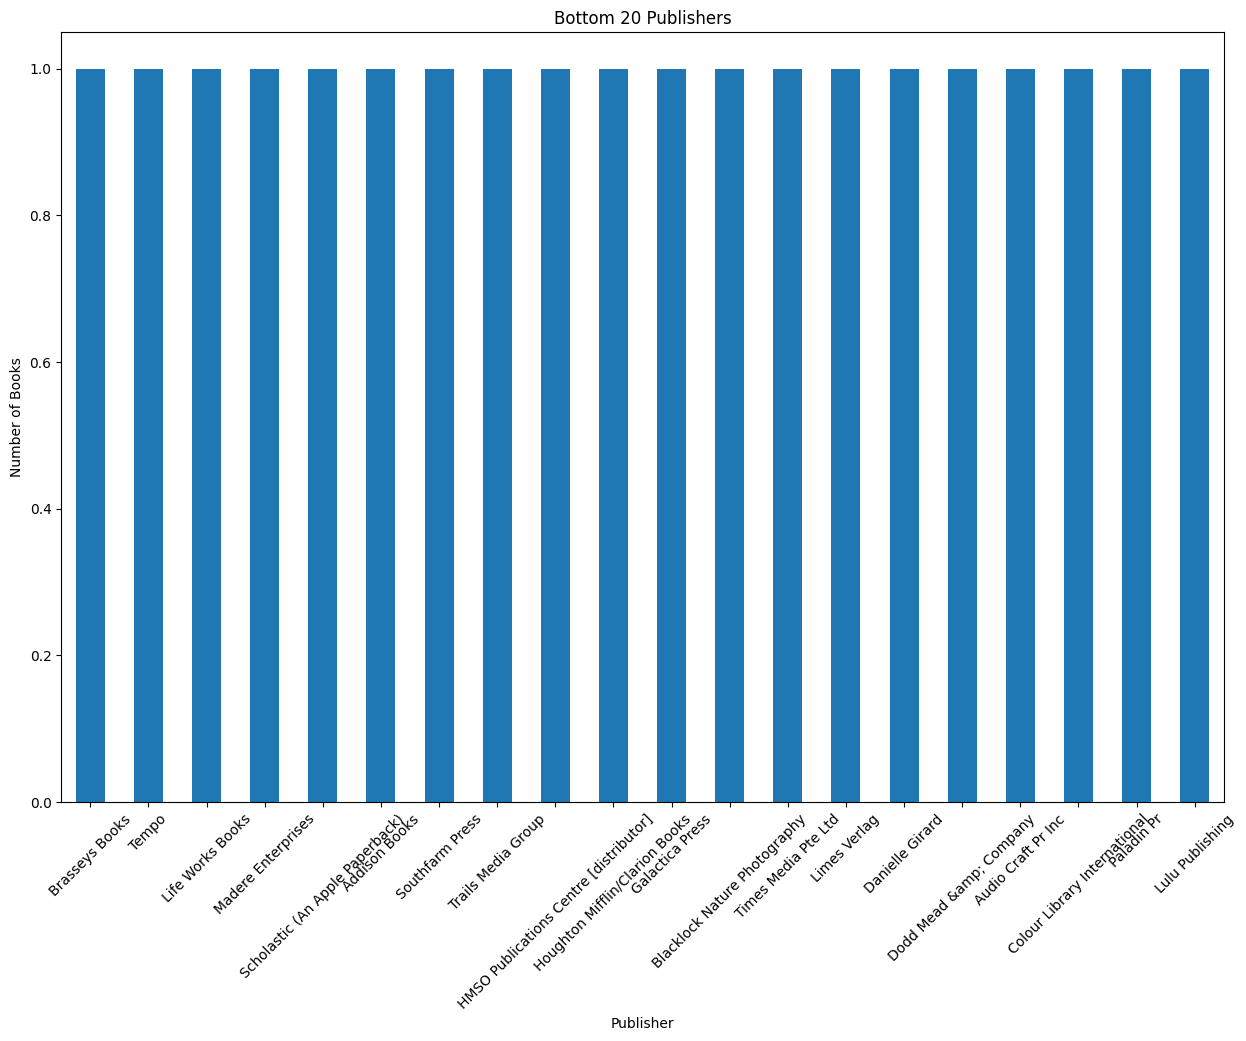

In [129]:
plt.figure(figsize=(15,10))
bottom_publishers.plot(kind='bar')
plt.title("Bottom 20 Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.show()

In [130]:
books_df.drop(columns='is_valid',inplace=True)

In [131]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271230,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271231,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271232,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271233,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


From these columns the image urls are not that much useful for now

In [132]:
user_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0
...,...,...,...
278853,278854,"portland, oregon, usa",32.0
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",32.0
278856,278857,"knoxville, tennessee, usa",32.0


In [133]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276746,0425115801,0
1,276746,0449006522,0
2,276746,0553561618,0
3,276746,055356451X,0
4,276746,0786013990,0
...,...,...,...
622788,276704,0441007813,0
622789,276704,0446353957,0
622790,276704,0446605409,0
622791,276704,0743211383,7


# Merging the Three datasets

In [134]:
# Merge ratings with users
ratings_users = ratings_df.merge(user_df, on='User-ID', how='inner')
ratings_users

,User-ID,ISBN,Book-Rating,Location,Age
0,276746,0425115801,0,"fort worth, ,",32.0
1,276746,0449006522,0,"fort worth, ,",32.0
2,276746,0553561618,0,"fort worth, ,",32.0
3,276746,055356451X,0,"fort worth, ,",32.0
4,276746,0786013990,0,"fort worth, ,",32.0
...,...,...,...,...,...
622788,276704,0441007813,0,"cedar park, texas, usa",32.0
622789,276704,0446353957,0,"cedar park, texas, usa",32.0
622790,276704,0446605409,0,"cedar park, texas, usa",32.0
622791,276704,0743211383,7,"cedar park, texas, usa",32.0


In [135]:
# Merge with books
df = ratings_users.merge(books_df, on='ISBN', how='inner')

In [136]:
df

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276746,0425115801,0,"fort worth, ,",32.0,Lightning,Dean R. Koontz,1996.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...
1,276746,0449006522,0,"fort worth, ,",32.0,Manhattan Hunt Club,JOHN SAUL,2002.0,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...
2,276746,0553561618,0,"fort worth, ,",32.0,Dark Paradise,TAMI HOAG,1994.0,Bantam,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...
3,276746,055356451X,0,"fort worth, ,",32.0,Night Sins,TAMI HOAG,1995.0,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
4,276746,0786013990,0,"fort worth, ,",32.0,At the Edge,David Dun,2002.0,Pinnacle Books,http://images.amazon.com/images/P/0786013990.0...,http://images.amazon.com/images/P/0786013990.0...,http://images.amazon.com/images/P/0786013990.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
600169,276704,0441007813,0,"cedar park, texas, usa",32.0,Obsidian Butterfly,Laurell K. Hamilton,2000.0,Ace Books,http://images.amazon.com/images/P/0441007813.0...,http://images.amazon.com/images/P/0441007813.0...,http://images.amazon.com/images/P/0441007813.0...
600170,276704,0446353957,0,"cedar park, texas, usa",32.0,Mirror Image,Sandra Brown,1990.0,Warner Books,http://images.amazon.com/images/P/0446353957.0...,http://images.amazon.com/images/P/0446353957.0...,http://images.amazon.com/images/P/0446353957.0...
600171,276704,0446605409,0,"cedar park, texas, usa",32.0,Plum Island,Nelson DeMille,1998.0,Warner Books,http://images.amazon.com/images/P/0446605409.0...,http://images.amazon.com/images/P/0446605409.0...,http://images.amazon.com/images/P/0446605409.0...
600172,276704,0743211383,7,"cedar park, texas, usa",32.0,Dreamcatcher,Stephen King,2001.0,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...


In [137]:
df.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Age                    0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [138]:
df.describe()

,User-ID,Book-Rating,Age,Year-Of-Publication
count,600174.000000,600174.000000,600174.000000,600174.000000
mean,140135.902881,2.666888,35.688104,1996.109881
std,80536.635499,3.813454,10.903908,6.675279
min,8.000000,0.000000,0.000000,1902.000000
25%,69919.000000,0.000000,31.000000,1993.000000
50%,139913.000000,0.000000,32.000000,1998.000000
75%,211351.000000,7.000000,41.000000,2001.000000
max,278854.000000,10.000000,116.000000,2020.000000


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600174 entries, 0 to 600173
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              600174 non-null  int64  
 1   ISBN                 600174 non-null  object 
 2   Book-Rating          600174 non-null  int64  
 3   Location             600174 non-null  object 
 4   Age                  600174 non-null  float64
 5   Book-Title           600174 non-null  object 
 6   Book-Author          600174 non-null  object 
 7   Year-Of-Publication  600174 non-null  float64
 8   Publisher            600174 non-null  object 
 9   Image-URL-S          600174 non-null  object 
 10  Image-URL-M          600174 non-null  object 
 11  Image-URL-L          600174 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 54.9+ MB


In [140]:
df['User-ID']

0         276746
1         276746
2         276746
3         276746
4         276746
           ...  
600169    276704
600170    276704
600171    276704
600172    276704
600173    276704
Name: User-ID, Length: 600174, dtype: int64

In [141]:
df['User-ID'].nunique()

21773

In [142]:
print("ratings_df:", len(ratings_df))
print("final_df:", len(df))

ratings_df: 622793
final_df: 600174


In [143]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [144]:
EDA_df=df[['User-ID', 'ISBN', 'Book-Rating', 'Book-Title']]

In [145]:
EDA_df.to_csv("Books_EDA_df.csv")

In [146]:
EDA_df.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276746,0425115801,0,Lightning
1,276746,0449006522,0,Manhattan Hunt Club
2,276746,0553561618,0,Dark Paradise
3,276746,055356451X,0,Night Sins
4,276746,0786013990,0,At the Edge


In [147]:
EDA_df.tail()

,User-ID,ISBN,Book-Rating,Book-Title
600169,276704,0441007813,0,Obsidian Butterfly
600170,276704,0446353957,0,Mirror Image
600171,276704,0446605409,0,Plum Island
600172,276704,0743211383,7,Dreamcatcher
600173,276704,080410526X,0,All I Really Need to Know


In [148]:
# Group by Book-ID to get count and average
book_stats = EDA_df.groupby('ISBN').agg({'Book-Rating': ['count', 'mean']})
book_stats.columns = ['num_ratings', 'avg_rating']  # rename columns
book_stats = book_stats.reset_index()
min_ratings = 10  # adjust as needed
popular_books = book_stats[book_stats['num_ratings'] >= min_ratings]
top_books = popular_books.sort_values(by='avg_rating', ascending=False)
top_books.head()

,ISBN,num_ratings,avg_rating
2455,0091842050,11,9.181818
38183,1577780728,10,8.600000
40264,3551551936,10,8.600000
13219,0385324138,10,8.300000
6175,0316779059,11,8.181818


In [149]:
top_books = top_books.merge(
    EDA_df[['ISBN', 'Book-Title']].drop_duplicates(),
    on='ISBN',
    how='left'
)

In [150]:
top_books

,ISBN,num_ratings,avg_rating,Book-Title
0,0091842050,11,9.181818,The Blue Day Book: A Lesson in Cheering Yourse...
1,1577780728,10,8.600000,Jesus Freaks: DC Talk and The Voice of the Mar...
2,3551551936,10,8.600000,Harry Potter Und Der Feuerkelch
3,0385324138,10,8.300000,The Outlandish Companion
4,0316779059,11,8.181818,The Baby Book: Everything You Need to Know Abo...
...,...,...,...,...
15775,0590997327,13,0.000000,"The Forgotten (Animorphs , No 11)"
15776,0440224330,17,0.000000,Manhattan Nocturne
15777,048628039X,10,0.000000,The Cricket on the Hearth and Other Christmas ...
15778,0451198301,10,0.000000,Torch


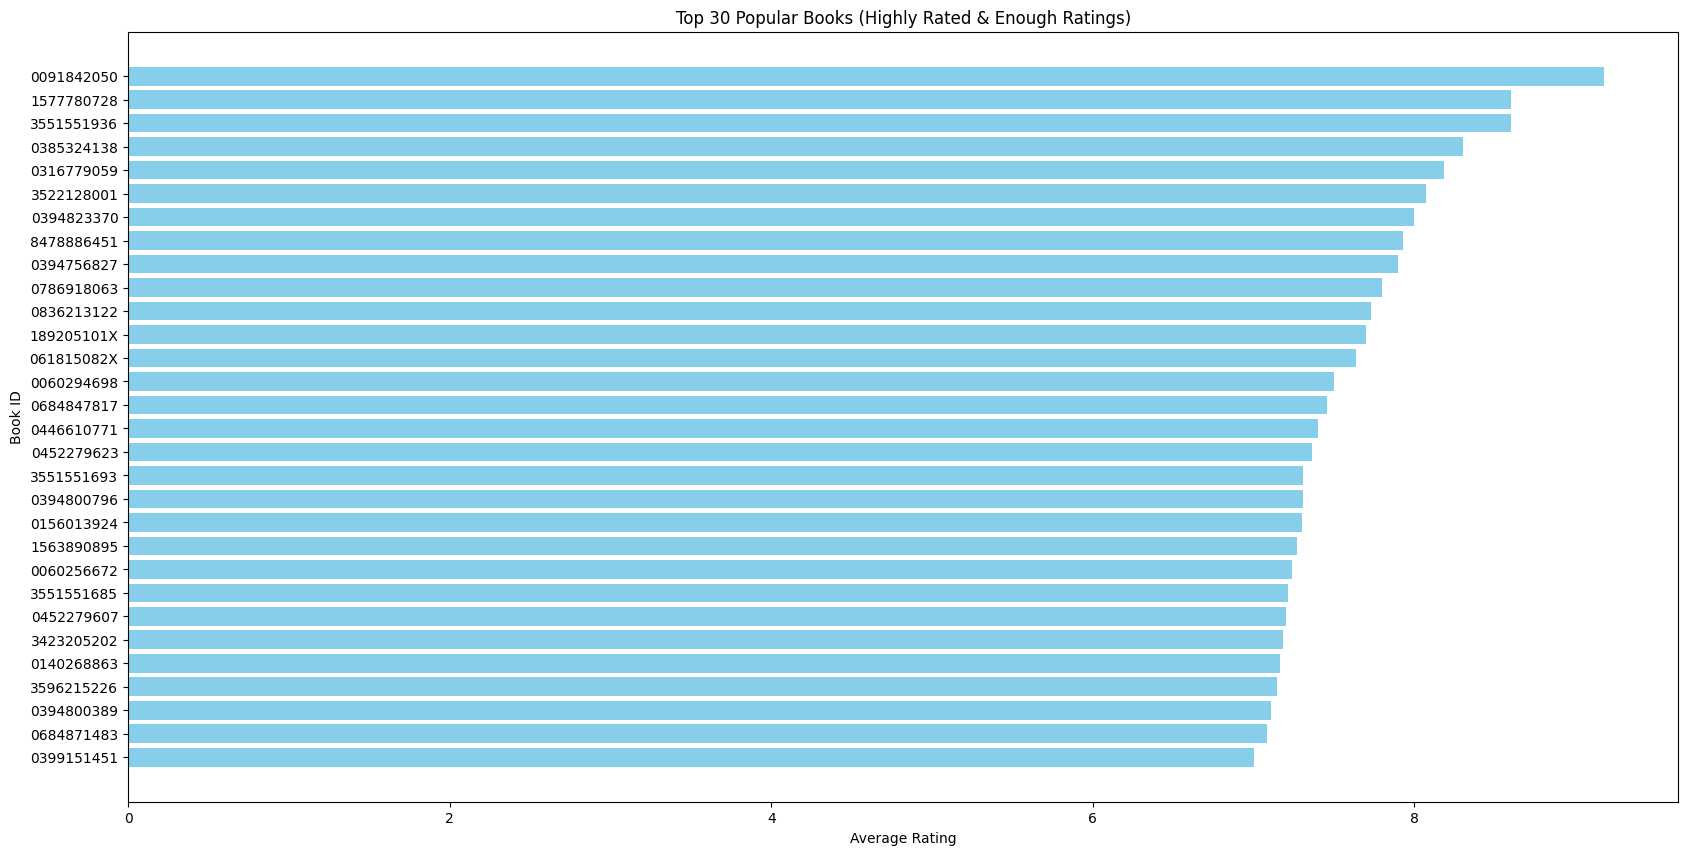

In [151]:
top_30=top_books.head(30)
#Plot
plt.figure(figsize=(20,10))
plt.barh(top_30['ISBN'][::-1], top_30['avg_rating'][::-1], color='skyblue')
plt.xlabel("Average Rating")
plt.ylabel("Book ID")
plt.title("Top 30 Popular Books (Highly Rated & Enough Ratings)")
plt.show()

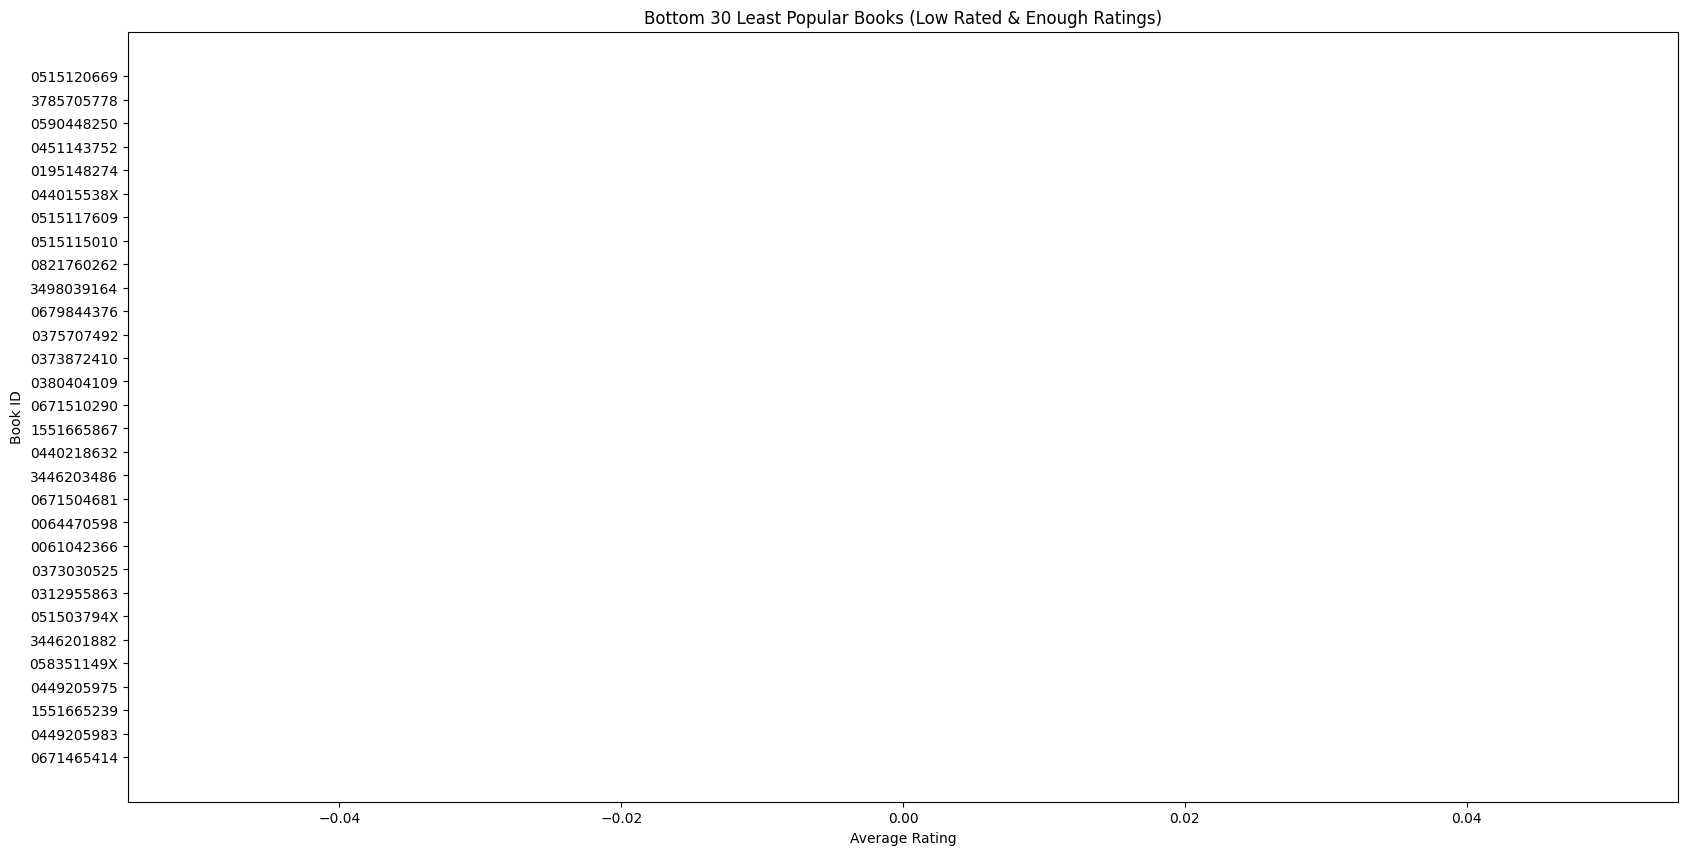

In [152]:
bottom_books=popular_books.sort_values(by='avg_rating', ascending=True).head(30)
bottom_books
#Plot
plt.figure(figsize=(20,10))
plt.barh(bottom_books['ISBN'][::-1], bottom_books['avg_rating'][::-1], color='skyblue')
plt.xlabel("Average Rating")
plt.ylabel("Book ID")
plt.title("Bottom 30 Least Popular Books (Low Rated & Enough Ratings)")
plt.show()

In [153]:
EDA_df

,User-ID,ISBN,Book-Rating,Book-Title
0,276746,0425115801,0,Lightning
1,276746,0449006522,0,Manhattan Hunt Club
2,276746,0553561618,0,Dark Paradise
3,276746,055356451X,0,Night Sins
4,276746,0786013990,0,At the Edge
...,...,...,...,...
600169,276704,0441007813,0,Obsidian Butterfly
600170,276704,0446353957,0,Mirror Image
600171,276704,0446605409,0,Plum Island
600172,276704,0743211383,7,Dreamcatcher


# Model Buliding 

### Collabarative Filtering

In [154]:
user_ids = EDA_df['User-ID'].astype('category').cat.codes # makes the each user_id to unique integer
book_ids = EDA_df['ISBN'].astype('category').cat.codes # makes each isbn into unique integer

In [155]:
EDA_df['User-ID'].nunique()

21773

In [156]:
EDA_df['ISBN'].nunique()

40909

In [157]:
EDA_df.shape

(600174, 4)

In [158]:
user_ids

0         21623
1         21623
2         21623
3         21623
4         21623
          ...  
600169    21622
600170    21622
600171    21622
600172    21622
600173    21622
Length: 600174, dtype: int16

In [159]:
book_ids

0         15056
1         18988
2         24347
3         24394
4         32402
          ...  
600169    17464
600170    17874
600171    18455
600172    30908
600173    33011
Length: 600174, dtype: int32

In [160]:
ratings = EDA_df['Book-Rating'].astype(float)

In [161]:
# here we are using csr_matrix because we have large data as pivot table creates large size
sparse_matrix = csr_matrix(
    (ratings, (user_ids, book_ids)),
    shape=(user_ids.nunique(), book_ids.nunique())
)

In [162]:
sparse_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 600172 stored elements and shape (21773, 40909)>

Here the sparse matix created 21773 rows(user_ids) and 40909 columns(book_ids) of data

In [163]:
print(sparse_matrix.nnz)     # Number of non-zero ratings

600172


In [164]:
# Show first 20 users and first 20 books sparse matrix
sparse_matrix[:20, :20].toarray()

array([[5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [165]:
df_sparse = pd.DataFrame.sparse.from_spmatrix(
    sparse_matrix,
    index=EDA_df['User-ID'].astype('category').cat.categories,
    columns=EDA_df['ISBN'].astype('category').cat.categories
)
df_sparse

,0002005018,0002116286,0002190915,0002239213,0002240114,0002243954,0002243962,0002244098,0002251760,000225414X,...,972210974X,9722111450,9724119378,9726101794,9727110800,9812327975,9871106181,9871138016,9871138148,9879397274
8,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# NMF(Non Negative Matrix factorization)

In [166]:
#Training model 
nmf_model = NMF(
    n_components=25, # latent features ][ NNDSVDA (Non-Negative Double Singular Value Decomposition)]
    init='nndsvda', # stratagy for matrices W and H 
    solver='cd', # coordinate decent  (fast)
    max_iter=500,
    alpha_W=0.001, # regularization strengths for matrix W(users)
    alpha_H=0.001, # regularization strengths for matrix H(items)
    l1_ratio=0.5, # L1 regularization
    beta_loss='frobenius', # standard l2 loss - because our data has ratings
    random_state=42
)
W = nmf_model.fit_transform(sparse_matrix)
H = nmf_model.components_

In [167]:
W # captures the user preferences 

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.03017974, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(21773, 25))

In [168]:
H  # captures the item characterstics

array([[0.27643722, 0.        , 0.        , ..., 0.        , 0.        ,
        0.24004737],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(25, 40909))

In [169]:
# Store mapping
user_categories = EDA_df['User-ID'].astype('category').cat.categories
book_categories = EDA_df['ISBN'].astype('category').cat.categories

**Popularity based(cold Start) + NMF (Non-Negative Matrix Factorization)** 

In [170]:
def recommend_nmf(user_id, top_n=5):
    # Fallback for new user
    if user_id not in user_categories:
        df =top_books.head(top_n)
        df = df.reset_index().drop_duplicates()
        return df[['ISBN','Book-Title']]
    # user index
    user_idx = np.where(user_categories == user_id)[0][0]
    user_vec = W[user_idx]         
    # Predict only for this user
    scores = np.dot(user_vec, H)    
    # Remove already rated books
    rated_books = sparse_matrix[user_idx].nonzero()[1]
    scores[rated_books] = -np.inf
    # Top recommended books
    top_books_idx = np.argsort(scores)[::-1][:top_n]
    df = pd.DataFrame({
        'ISBN': [book_categories[b] for b in top_books_idx],
        'Book-Title': [
            EDA_df.loc[EDA_df['ISBN']==book_categories[b],'Book-Title'].iloc[0]
            for b in top_books_idx
        ],
    })
    return df.reset_index(drop=True)

In [171]:
user_id = 276746
recommend_nmf(user_id,10)

,ISBN,Book-Title
0,9879397274,Desde Mi Cielo
1,9871138148,Cien Anos de Soledad / One Hundred Years of So...
2,9871138016,Cronica De Una Muerte Anunciada
3,9871106181,El Club Dumas
4,9812327975,Notes From an Even Smaller Island
5,9727110800,O Diario De Um Mago
6,9726101794,As mulheres deviam vir com livro de instruÃ§Ãµ...
7,9724119378,O Deus Das Pequenas Coisas
8,9722111450,Terra do pecado: Romance
9,972210974X,Um deus passeando pela brisa da tarde: Romance...


In [172]:
user_id = 276744 
recommend_nmf(user_id,10)

,ISBN,Book-Title
0,0091842050,The Blue Day Book: A Lesson in Cheering Yourse...
1,1577780728,Jesus Freaks: DC Talk and The Voice of the Mar...
2,3551551936,Harry Potter Und Der Feuerkelch
3,0385324138,The Outlandish Companion
4,0316779059,The Baby Book: Everything You Need to Know Abo...
5,3522128001,Die unendliche Geschichte: Von A bis Z
6,0394823370,The Lorax
7,8478886451,Harry Potter y el cÃ¡liz de fuego
8,0394756827,"Godel, Escher, Bach: An Eternal Golden Braid"
9,0786918063,"Test of the Twins (Dragonlance Legends, Vol. 3)"


In [173]:
user_id = 276704
recommend_nmf(user_id,10)

,ISBN,Book-Title
0,0002005018,Clara Callan
1,9879397274,Desde Mi Cielo
2,9871138148,Cien Anos de Soledad / One Hundred Years of So...
3,9871138016,Cronica De Una Muerte Anunciada
4,9871106181,El Club Dumas
5,9812327975,Notes From an Even Smaller Island
6,9727110800,O Diario De Um Mago
7,9726101794,As mulheres deviam vir com livro de instruÃ§Ãµ...
8,9724119378,O Deus Das Pequenas Coisas
9,9722111450,Terra do pecado: Romance


In [174]:
user_id = 276714
recommend_nmf(user_id,10)

,ISBN,Book-Title
0,0091842050,The Blue Day Book: A Lesson in Cheering Yourse...
1,1577780728,Jesus Freaks: DC Talk and The Voice of the Mar...
2,3551551936,Harry Potter Und Der Feuerkelch
3,0385324138,The Outlandish Companion
4,0316779059,The Baby Book: Everything You Need to Know Abo...
5,3522128001,Die unendliche Geschichte: Von A bis Z
6,0394823370,The Lorax
7,8478886451,Harry Potter y el cÃ¡liz de fuego
8,0394756827,"Godel, Escher, Bach: An Eternal Golden Braid"
9,0786918063,"Test of the Twins (Dragonlance Legends, Vol. 3)"


In [175]:
EDA_df

,User-ID,ISBN,Book-Rating,Book-Title
0,276746,0425115801,0,Lightning
1,276746,0449006522,0,Manhattan Hunt Club
2,276746,0553561618,0,Dark Paradise
3,276746,055356451X,0,Night Sins
4,276746,0786013990,0,At the Edge
...,...,...,...,...
600169,276704,0441007813,0,Obsidian Butterfly
600170,276704,0446353957,0,Mirror Image
600171,276704,0446605409,0,Plum Island
600172,276704,0743211383,7,Dreamcatcher


In [201]:
def make_leave_one_out_split(df):
    df = df.sort_values(['User-ID']).copy()
    
    test = df.groupby('User-ID').tail(1)
    train = df.drop(test.index)
    return train, test
train_df, test_df = make_leave_one_out_split(EDA_df)

* We use Leave-One-Out because it simulates real recommendation scenarios.
* Random/80–20 splits ruin user history and break similarity models.
* LOO gives fair, stable, comparable Top-N metrics (Precision@K, NDCG@K).
* Industry + research universally use LOO for recommendation evaluation.

In [202]:
test_dict = (
    test_df.groupby("User-ID")["ISBN"]
    .apply(list)
    .to_dict()
)
test_dict

{8: ['0425176428'],
 17: ['0312978383'],
 44: ['0425182908'],
 53: ['0380715899'],
 69: ['1853260053'],
 99: ['0316973742'],
 114: ['0553584383'],
 160: ['9724119378'],
 165: ['0671004573'],
 176: ['0393020371'],
 183: ['8440630794'],
 199: ['0385336772'],
 232: ['0486284735'],
 242: ['3257233051'],
 243: ['0060977493'],
 244: ['0151008116'],
 254: ['0060976977'],
 272: ['0670856045'],
 300: ['0449912302'],
 362: ['0446606197'],
 383: ['038542471X'],
 384: ['156718796X'],
 387: ['0451527747'],
 388: ['006101351X'],
 392: ['8478800336'],
 408: ['044021145X'],
 424: ['0375726403'],
 444: ['0440235057'],
 446: ['0312195516'],
 460: ['8845229041'],
 476: ['0312288115'],
 486: ['0385721420'],
 487: ['0553107305'],
 503: ['0451522346'],
 505: ['0805056491'],
 507: ['0553583441'],
 566: ['0312206763'],
 567: ['0486272745'],
 595: ['0060083298'],
 619: ['0062517856'],
 625: ['2253007102'],
 626: ['0140048944'],
 638: ['0316789089'],
 643: ['0767908473'],
 651: ['0307215342'],
 709: ['015216257

In [203]:
len(test_dict)

21773

In [204]:
def precision_at_k(actual, predicted, k):
    if len(predicted) == 0:
        return 0
    pred_k = set(predicted[:k])
    actual_set = set(actual)
    return len(pred_k & actual_set) / k

def recall_at_k(actual, predicted, k):
    pred_k = set(predicted[:k])
    actual_set = set(actual)
    return len(pred_k & actual_set) / len(actual) if len(actual) > 0 else 0

def ndcg_at_k(actual, predicted, k):
    dcg = 0.0
    for i, item in enumerate(predicted[:k]):
        if item in actual:
            dcg += 1 / np.log2(i + 2)

    idcg = sum(1 / np.log2(i + 2) for i in range(min(len(actual), k)))
    return dcg / idcg if idcg > 0 else 0


In [205]:
def recommend_nmf_isbn(user_id, top_n=10):
    df = recommend_nmf(user_id, top_n)
    return df["ISBN"].tolist()

In [206]:
def evaluate_nmf_recommender(test_dict, top_k=10, sample_size=500):
    users = list(test_dict.keys())

    # Evaluate only a random sample (for speed)
    users = random.sample(users, min(sample_size, len(users)))
    precisions = []
    recalls = []
    ndcgs = []
    for user in users:
        actual = test_dict[user]               # the book the user actually interacted with
        predicted = recommend_nmf_isbn(user, top_k) # model's recommendations
        precisions.append(precision_at_k(actual, predicted, top_k))
        recalls.append(recall_at_k(actual, predicted, top_k))
        ndcgs.append(ndcg_at_k(actual, predicted, top_k))
    return {
        "Precision@K": np.mean(precisions),
        "Recall@K": np.mean(recalls),
        "NDCG@K": np.mean(ndcgs)
    }

In [207]:
results = evaluate_nmf_recommender(test_dict, top_k=10, sample_size=1000)
print(results)

{'Precision@K': np.float64(0.00030000000000000003), 'Recall@K': np.float64(0.003), 'NDCG@K': np.float64(0.0018010299956639812)}


**We select NMF as best recommendation system**
* NMF handles non-negative rating matrices
* Better at reconstructing missing values
* Works well on sparse data like your book dataset
* Captures hidden patterns (latent factors)

In [208]:
import os
# Create directory if not exists
os.makedirs("model", exist_ok=True)
# To save NMF matrices
np.save("W.npy", W)
np.save("H.npy", H)
# To save category mappings
np.save("user_categories.npy", user_categories)
np.save("book_categories.npy", book_categories)
np.save("sparse_matrix.npy",sparse_matrix) 
# To save book metadata (ISBN + Title)
books_df = df[['ISBN', 'Book-Title', 'Image-URL-M']].drop_duplicates()
books_df.to_csv("books.csv", index=False)

print("All model files saved successfully!")


All model files saved successfully!


In [250]:
print(W.min(), W.max())
print(H.min(), H.max())

0.0 27.073937009673752
0.0 19.56106518307057


In [178]:
from sklearn.decomposition import NMF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np

# -------------------------------
# 1. Custom scoring function
# -------------------------------
def nmf_rmse(true_matrix, reconstructed_matrix):
    mask = true_matrix > 0  # only compare known ratings
    diff = (true_matrix[mask] - reconstructed_matrix[mask]) ** 2
    return np.sqrt(diff.mean())

def nmf_scorer(estimator, X):
    W = estimator.transform(X)
    H = estimator.components_
    reconstructed = np.dot(W, H)
    return -nmf_rmse(X.toarray(), reconstructed)  # negative for GridSearchCV (maximize)
    
custom_scorer = make_scorer(nmf_scorer, greater_is_better=True)

# -------------------------------
# 2. NMF model
# -------------------------------
nmf = NMF(init='nndsvda', max_iter=400, random_state=42)

# -------------------------------
# 3. Parameter grid to tune
# -------------------------------
param_grid = {
    "n_components":  [20,50, 80],
    "alpha_W": [0.001, 0.01],
    "alpha_H": [ 0.001, 0.01],
    "l1_ratio": [ 0.5, 1.0],
    "solver": ["cd"],
    "beta_loss": ["frobenius"],  # for ratings
}

# -------------------------------
# 4. GridSearchCV
# -------------------------------
grid = GridSearchCV(
    estimator=nmf,
    param_grid=param_grid,
    scoring=custom_scorer,
    cv=3,
    verbose=2
)

# -------------------------------
# 5. Fit the grid search
# -------------------------------
grid.fit(sparse_matrix)

print("Best parameters:", grid.best_params_)
print("Best RMSE:", -grid.best_score_)

# -------------------------------
# 6. Train final NMF with best params
# -------------------------------
best_nmf = grid.best_estimator_

W = best_nmf.transform(sparse_matrix)
H = best_nmf.components_


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END alpha_H=0.001, alpha_W=0.001, beta_loss=frobenius, l1_ratio=0.5, n_components=20, solver=cd; total time=   2.0s
[CV] END alpha_H=0.001, alpha_W=0.001, beta_loss=frobenius, l1_ratio=0.5, n_components=20, solver=cd; total time=   2.4s
[CV] END alpha_H=0.001, alpha_W=0.001, beta_loss=frobenius, l1_ratio=0.5, n_components=20, solver=cd; total time=   1.9s
[CV] END alpha_H=0.001, alpha_W=0.001, beta_loss=frobenius, l1_ratio=0.5, n_components=50, solver=cd; total time=   5.7s
[CV] END alpha_H=0.001, alpha_W=0.001, beta_loss=frobenius, l1_ratio=0.5, n_components=50, solver=cd; total time=  11.5s
[CV] END alpha_H=0.001, alpha_W=0.001, beta_loss=frobenius, l1_ratio=0.5, n_components=50, solver=cd; total time=   8.9s
[CV] END alpha_H=0.001, alpha_W=0.001, beta_loss=frobenius, l1_ratio=0.5, n_components=80, solver=cd; total time=  14.7s
[CV] END alpha_H=0.001, alpha_W=0.001, beta_loss=frobenius, l1_ratio=0.5, n_components=80, s